# <center> Loan_Prediction </center>
__________________


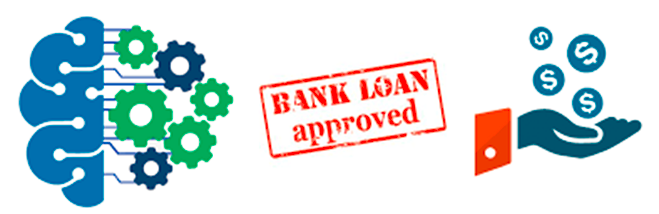

____________________

 -Description des variables :
 
    -Loan_ID Unique Loan ID : Identifiant unique 
    -Gender - Male/ Female : Genre Male/Female pour Homme et Femme
    -Married - Applicant married (Y/N) : Savoir si la personne est mariée ou non
    -Dependents - Number of dependents : Nombre de personnes à charge
    -Education - Applicant Education (Graduate/ Under Graduate) : Formation du candidat (diplômé/non diplômé)
    -Self_Employed - Self employed (Y/N) : Travailleurs indépendants (Oui/Non)
    -ApplicantIncome - Applicant income : Revenu du demandeur
    -CoapplicantIncome - Coapplicant income : Revenu d'un second demandeur
    -LoanAmount - Loan amount in thousands : Montant du prêt en milliers
    -Loan_Amount_Term - Term of loan in months : Durée du prêt en mois
    -Credit_History - credit history meets guidelines : Antécédents de crédit payé à temps
    -Property_Area - Urban/ Semi Urban/ Rural - Zone_de_propriété (Urbain/ Semi-urbain/ Rural)
    -Loan_Status - Loan approved (Y/N) - Prêt approuvé (O/N)
    
____________________

L'Etude est de savoir si un pret peut être accordé en fonction des parametres d'entrées.
On est donc dans un problème lié à la classification.

Nous allons commencer par étudier les données, les visualiser et les nettoyer.
Ensuite nous nous pencherons sur les différents algorithmse de classification.
Puis nous continuerons par afficher les metrics pertinents et tirer les conclusions de l'étude.

_________________________

### <center>  Exploration de données </center>

In [1]:
# importer les librairie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as mno

In [2]:
# importer les données
df = pd.read_csv("datasets/train.csv", delimiter = ",")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [4]:
# Voir la description du dataset
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [6]:
# information sur le dataset, sur le type de colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


___________________________

In [7]:
# Compter le nombre de valeurs null par colonne dans le dataset
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

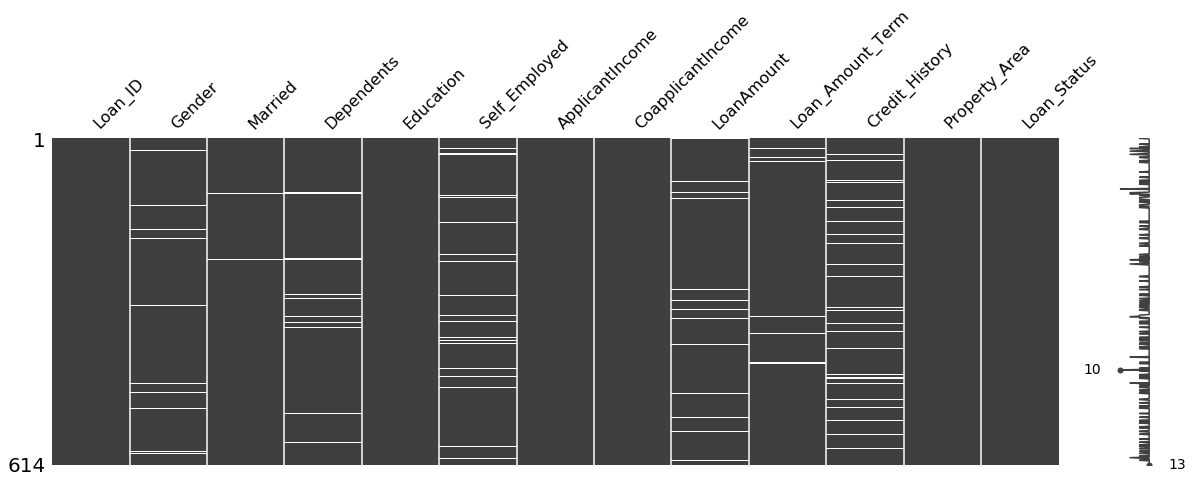

In [8]:
#Affichage des données manquantes
mno.matrix(df, figsize = (20, 6))

__________________

In [9]:
# Réflexion sur le type de features
numeric_features = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = df.iloc[:, ::].select_dtypes(include = ['object']).columns

print("Numeric features:", numeric_features.to_list())
print("Categorical features:", categorical_features.to_list())

Numeric features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


___________

In [30]:
# visualisation des différentes valeurs par catégorie

tab_categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
for i in tab_categorical:
    values = df[i].value_counts(normalize = True)
    print(values)
    print ("\n\n", '≡'*40, "\n")
    

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

Yes    0.651391
No     0.348609
Name: Married, dtype: float64


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     

__________________________________

### <center>  Visualisation de données </center>

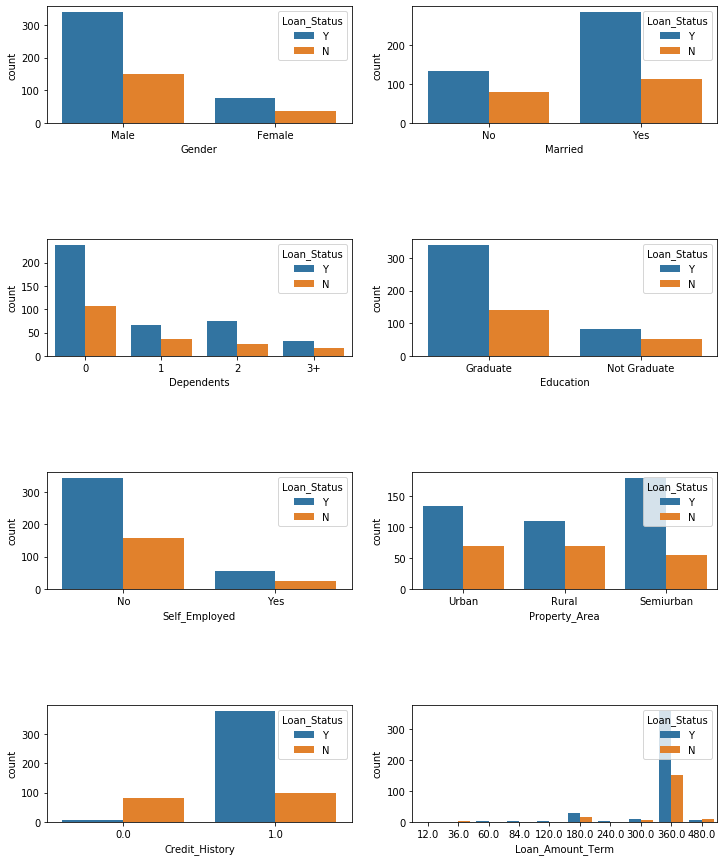

In [22]:
# Mise en avant des features de catégorie en fonction du target 

tab_numerical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
 
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(tab_categorical):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

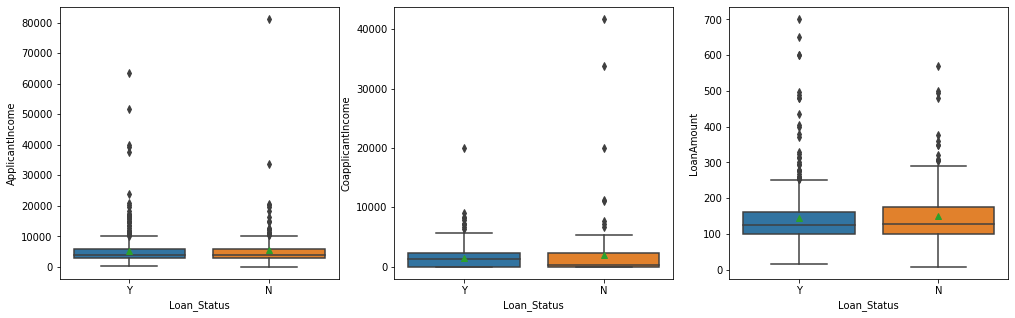

In [41]:
# Mise en avant des outliers pour les features numerique en fonction du target

tab_numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for i,cat_col in enumerate(tab_numerical):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[i], showmeans = True)
    
plt.subplots_adjust(hspace=1)